**Upload train.json, requirements.py, visualize.py, preprocess.py and feature_extraction.py**

In [1]:
!pip install pyphen
from requirements import *
from visualize import *
from preprocess import *
from feature_extraction import *

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet

In [11]:
pip freeze

absl-py==0.9.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
asgiref==3.2.7
astor==0.8.1
astropy==4.0.1.post1
astunparse==1.6.3
atari-py==0.2.6
atomicwrites==1.3.0
attrs==19.3.0
audioread==2.1.8
autograd==1.3
Babel==2.8.0
backcall==0.1.0
beautifulsoup4==4.6.3
bleach==3.1.4
blis==0.4.1
bokeh==1.4.0
boto==2.49.0
boto3==1.12.40
botocore==1.15.40
Bottleneck==1.3.2
branca==0.4.0
bs4==0.0.1
CacheControl==0.12.6
cachetools==3.1.1
catalogue==1.0.0
certifi==2020.4.5.1
cffi==1.14.0
chainer==6.5.0
chardet==3.0.4
click==7.1.1
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.4.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.2.0
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.5
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.3
Cython==0.29.16
daft==0.0.4
dask==2.12.0
dataclasses==0.7
datascience==0.10.6
decorator==4.4.2
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.1.1
distributed==1.25.3
Django==3.0.5
dlib==19.18.0
docopt==0.6.2
docutils==0.15.2
dopami

In [0]:
def preprocess(stopwords):
  stop_words = set(stopwords.words('english')) 
  default_pattern =  r"""(?x)                  
                        (?:[A-Z]\.)+          
                        |\$?\d+(?:\.\d+)?%?    
                        |\w+(?:[-']\w+)*      
                    """
  with open('train.json') as json_file:
      data = json.load(json_file)
  return data

**Dataset summary:**

In [3]:
data = preprocess(stopwords)
batches = []
i = 0
while i < 250000:
  batches.append(i)
  i += 20000

mcount = 0
fcount = 0
ecount = 0
avg_size = 0
for i in batches:
  essays, gender_label, age_label, original_data = prepare_data(data, i, 20000)
  mcount, fcount, ecount, avg_size = gender_summary(essays, gender_label, mcount,fcount,ecount,avg_size)

print('Data summary for gender prediction task')
print('Number of male writers:', mcount)
print('Number of female writers:', fcount)
print('Number of essays used:', ecount)
print('Average document size:', avg_size/ecount, 'words')
print('Unique number of labels:', 2)

Data summary for gender prediction task
Number of male writers: 132469
Number of female writers: 127531
Number of essays used: 260000
Average document size: 204.52252307692308 words
Unique number of labels: 2


# **Gender profiling**

#  Using possessive features:

In [0]:
###----Logistic Regression WITH POSSESSIVES-----------
#classifier = svm.SVC(max_iter=5000)
trainlength = round(0.8*20000)
classifier = LogisticRegression(random_state=0, max_iter=1000)

batches = []
i = 0
while i < 250000:
  batches.append(i)
  i += 20000
acc = 0
for i in batches:
  essays, gender_label, age_label, original_data = prepare_data(data, i, 20000)
  my_feature, other_feature, total_dict = possessives_features(essays)
  features = my_feature
  Xtrain = np.asarray(features[:trainlength])
  Ytrain = np.asarray(gender_label[:trainlength])

#Xtrain = Xtrain.reshape(-1, 1)

  classifier.fit(Xtrain, Ytrain)
#classifier.fit(Xtrain, Ytrain)
  Xtest = np.asarray(features[trainlength:])
  Ytest = np.asarray(gender_label[trainlength:])

#Xtest = Xtest.reshape(-1, 1)
  #print('done with split')
  pred = classifier.predict(Xtest)
  acc += accuracy_score(Ytest, pred)
  print('Batch', batches.index(i), ':', accuracy_score(Ytest, pred))
print('Overall accuracy:', acc/len(batches))

Batch 0 : 0.5715
Batch 1 : 0.556
Batch 2 : 0.56525
Batch 3 : 0.548
Batch 4 : 0.55675
Batch 5 : 0.566
Batch 6 : 0.56625
Batch 7 : 0.5655
Batch 8 : 0.56025
Batch 9 : 0.56825
Batch 10 : 0.5495
Batch 11 : 0.56275
Batch 12 : 0.56975
Overall accuracy: 0.5619807692307692


In [6]:
###-----KNN WITH POSSESSIVES FEATURES---------
#6000:51, 10000:52.45
clf = neighbors.KNeighborsClassifier(75)

batches = []
i = 0
while i < 250000:
  batches.append(i)
  i += 10000
acc = 0

for i in batches:
  essays, gender_label, age_label, original_data = prepare_data(data, i, 10000)
  my_feature, other_feature, total_dict = possessives_features(essays)
  features = my_feature

  length = len(my_feature)
  trainlength = round(0.8*length)
  features = my_feature
  Xtrain = np.asarray(features[:trainlength])
  Ytrain = np.asarray(gender_label[:trainlength])
  clf.fit(Xtrain, Ytrain)

  Xtest = np.asarray(features[trainlength:])
  Ytest = np.asarray(gender_label[trainlength:])

#Xtest = Xtest.reshape(-1, 1)

  pred = clf.predict(Xtest)
  acc += accuracy_score(Ytest, pred)
  print('Batch', batches.index(i), ':',accuracy_score(Ytest, pred))
print('Overall accuracy:', acc/len(batches))

Batch 0 : 0.5245
Batch 1 : 0.5455
Batch 2 : 0.4775
Batch 3 : 0.519
Batch 4 : 0.553
Batch 5 : 0.519
Batch 6 : 0.519
Batch 7 : 0.5235
Batch 8 : 0.526
Batch 9 : 0.517
Batch 10 : 0.5325
Batch 11 : 0.542
Batch 12 : 0.485
Batch 13 : 0.532
Batch 14 : 0.5585
Batch 15 : 0.5285
Batch 16 : 0.5335
Batch 17 : 0.531
Batch 18 : 0.5525
Batch 19 : 0.5375
Batch 20 : 0.5185
Batch 21 : 0.515
Batch 22 : 0.484
Batch 23 : 0.5385
Batch 24 : 0.564
Overall accuracy: 0.52708


# **Using POS features**

In [10]:
###------SVM WITH POS_FEATURES-------

classifier = svm.SVC(kernel='rbf')
length = 20000
trainlength = round(0.8*length)
acc = 0

batches = []
i = 0
while i < 250000:
  batches.append(i)
  i += 20000

for i in batches:
  essays, gender_label, age_label, original_data = prepare_data(data, i, 20000)
  pos_features = POS(essays)
  features = pos_features
  Xtrain = np.asarray(features[:trainlength])
  Ytrain = np.asarray(gender_label[:trainlength])

#Xtrain = Xtrain.reshape(-1, 1)

  classifier.fit(Xtrain, Ytrain)
  Xtest = np.asarray(features[trainlength:])
  Ytest = np.asarray(gender_label[trainlength:])

#Xtest = Xtest.reshape(-1, 1)

  pred = classifier.predict(Xtest)
  acc += accuracy_score(Ytest, pred)
  print('Batch', batches.index(i), ':',accuracy_score(Ytest, pred))
print('Overall accuracy', acc/len(batches))

Batch 0 : 0.60375
Batch 1 : 0.57975
Batch 2 : 0.58175
Batch 3 : 0.57875
Batch 4 : 0.57175
Batch 5 : 0.582
Batch 6 : 0.57575
Batch 7 : 0.57825
Batch 8 : 0.579
Batch 9 : 0.58075
Batch 10 : 0.58775
Batch 11 : 0.5855
Batch 12 : 0.586
Overall accuracy 0.5823653846153846


In [0]:
###-----KNN WITH POS_FEATURES---------

clf = neighbors.KNeighborsClassifier(75)

length = 20000
trainlength = round(0.8*length)
acc = 0

batches = []
i = 0
while i < 250000:
  batches.append(i)
  i += 20000

for i in batches:
  essays, gender_label, age_label, original_data = prepare_data(data, i, 20000)
  pos_features = POS(essays)
  features = pos_features
  Xtrain = np.asarray(features[:trainlength])
  Ytrain = np.asarray(gender_label[:trainlength])

  clf.fit(Xtrain, Ytrain)

  Xtest = np.asarray(features[trainlength:])
  Ytest = np.asarray(gender_label[trainlength:])

#Xtest = Xtest.reshape(-1, 1)

  pred = clf.predict(Xtest)
  print('Batch', batches.index(i), ':',accuracy_score(Ytest, pred))
  acc += accuracy_score(Ytest, pred)
print('Overall accuracy:', acc/len(batches))

Batch 0 : 0.58725
Batch 1 : 0.572
Batch 2 : 0.564
Batch 3 : 0.57725
Batch 4 : 0.56325
Batch 5 : 0.56475
Batch 6 : 0.57825
Batch 7 : 0.57025
Batch 8 : 0.57925
Batch 9 : 0.58375
Batch 10 : 0.581
Batch 11 : 0.584
Batch 12 : 0.57675
Overall accuracy: 0.5755192307692307


**POS features visualization**

NameError: ignored

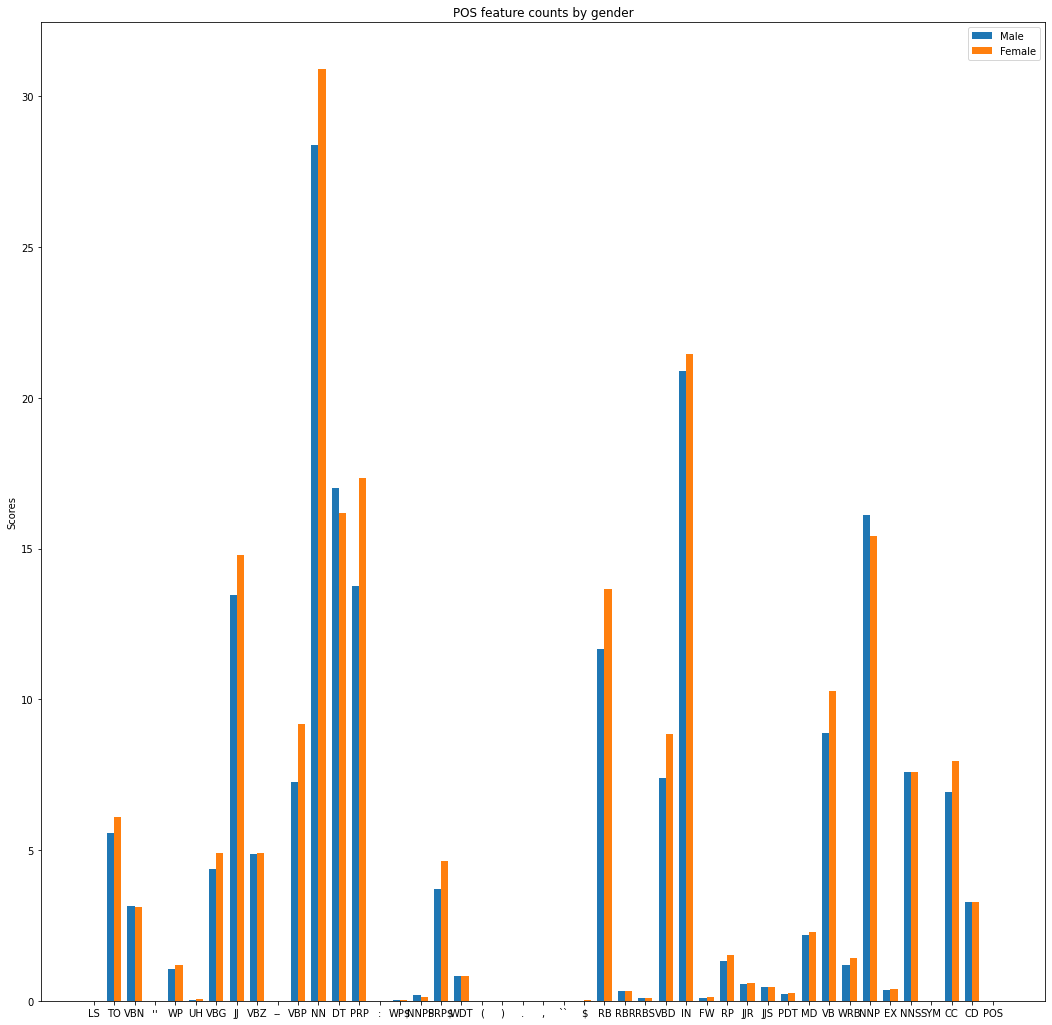

In [11]:
###-------POS FEATURES VISUALIZATION----------

labels = []
length = len(tagdict)
male_means = np.zeros(length)
female_means = np.zeros(length)

for label in tagdict:
  labels.append(label)

male_count = 0
female_count = 0
for idx in range(len(essays)):
  if gender_label[idx] == 0: #male
    male_means += np.asarray(pos_features[idx])
    male_count += 1
  else:
    female_means += np.asarray(pos_features[idx])
    female_count += 1

male_means = male_means/male_count
female_means = female_means/female_count

male_means = list(male_means)
female_means = list(female_means)

create_plot(labels, male_means, female_means, 'POS feature counts by gender',1, 18,0)


#  **f-measure Visualization:**

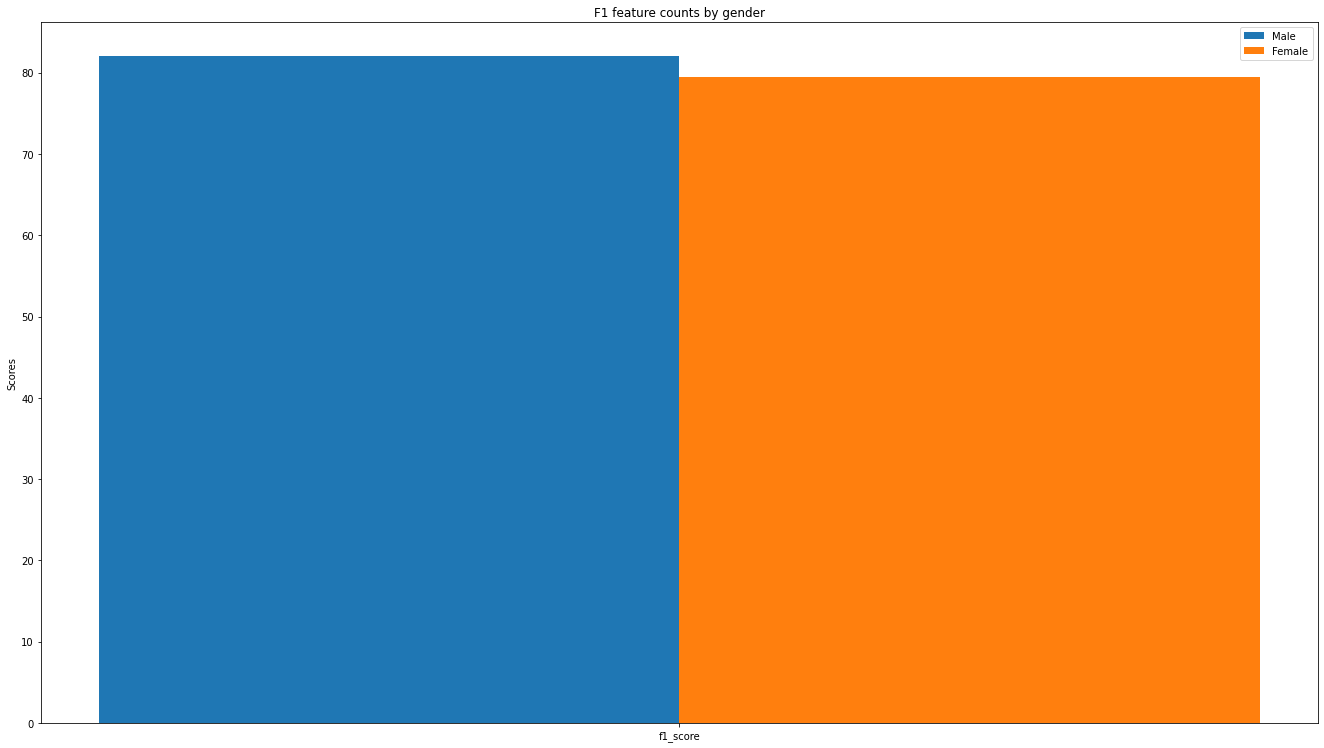

In [0]:
###-------F1 FEATURES VISUALIZATION---------- (for one batch)
labels = []
male_means = np.zeros(1)
female_means = np.zeros(1)
labels.append('f1_score')

pos_feature = POS(essays)
f_feature = f(pos_features)

male_count = 0
female_count = 0
for idx in range(len(essays)):
  if gender_label[idx] == 0: #male
    male_means += np.asarray(f_feature[idx])
    male_count += 1
  else:
    female_means += np.asarray(f_feature[idx])
    female_count += 1

male_means = male_means/male_count
female_means = female_means/female_count

male_means = list(male_means)
female_means = list(female_means)

create_plot(labels, male_means, female_means, 'F1 feature counts by gender', 0, 5, 0)

# **Using POS bigrams:**

In [7]:
###------SVM WITH POS_SEQ_FEATURES-------
acc = 0
classifier = svm.SVC(kernel='rbf')

i = 0
while i < 100000:
  batches.append(i)
  i += 20000

batches = []
for i in batches:
  essays, gender_label, age_label, original_data = prepare_data(data, i, 20000)
  pos_seq_features = pos_seq(essays)
  length = len(pos_seq_features)
  trainlength = round(0.8*length)
  features = pos_seq_features
  Xtrain = np.asarray(features[:trainlength])
  Ytrain = np.asarray(gender_label[:trainlength])

#Xtrain = Xtrain.reshape(-1, 1)

  classifier.fit(Xtrain, Ytrain)
  Xtest = np.asarray(features[trainlength:])
  Ytest = np.asarray(gender_label[trainlength:])

#Xtest = Xtest.reshape(-1, 1)

  pred = classifier.predict(Xtest)
  acc += accuracy_score(Ytest, pred)
print('Overall accuracy:',acc/len(batches))

Overall accuracy: 0.5975


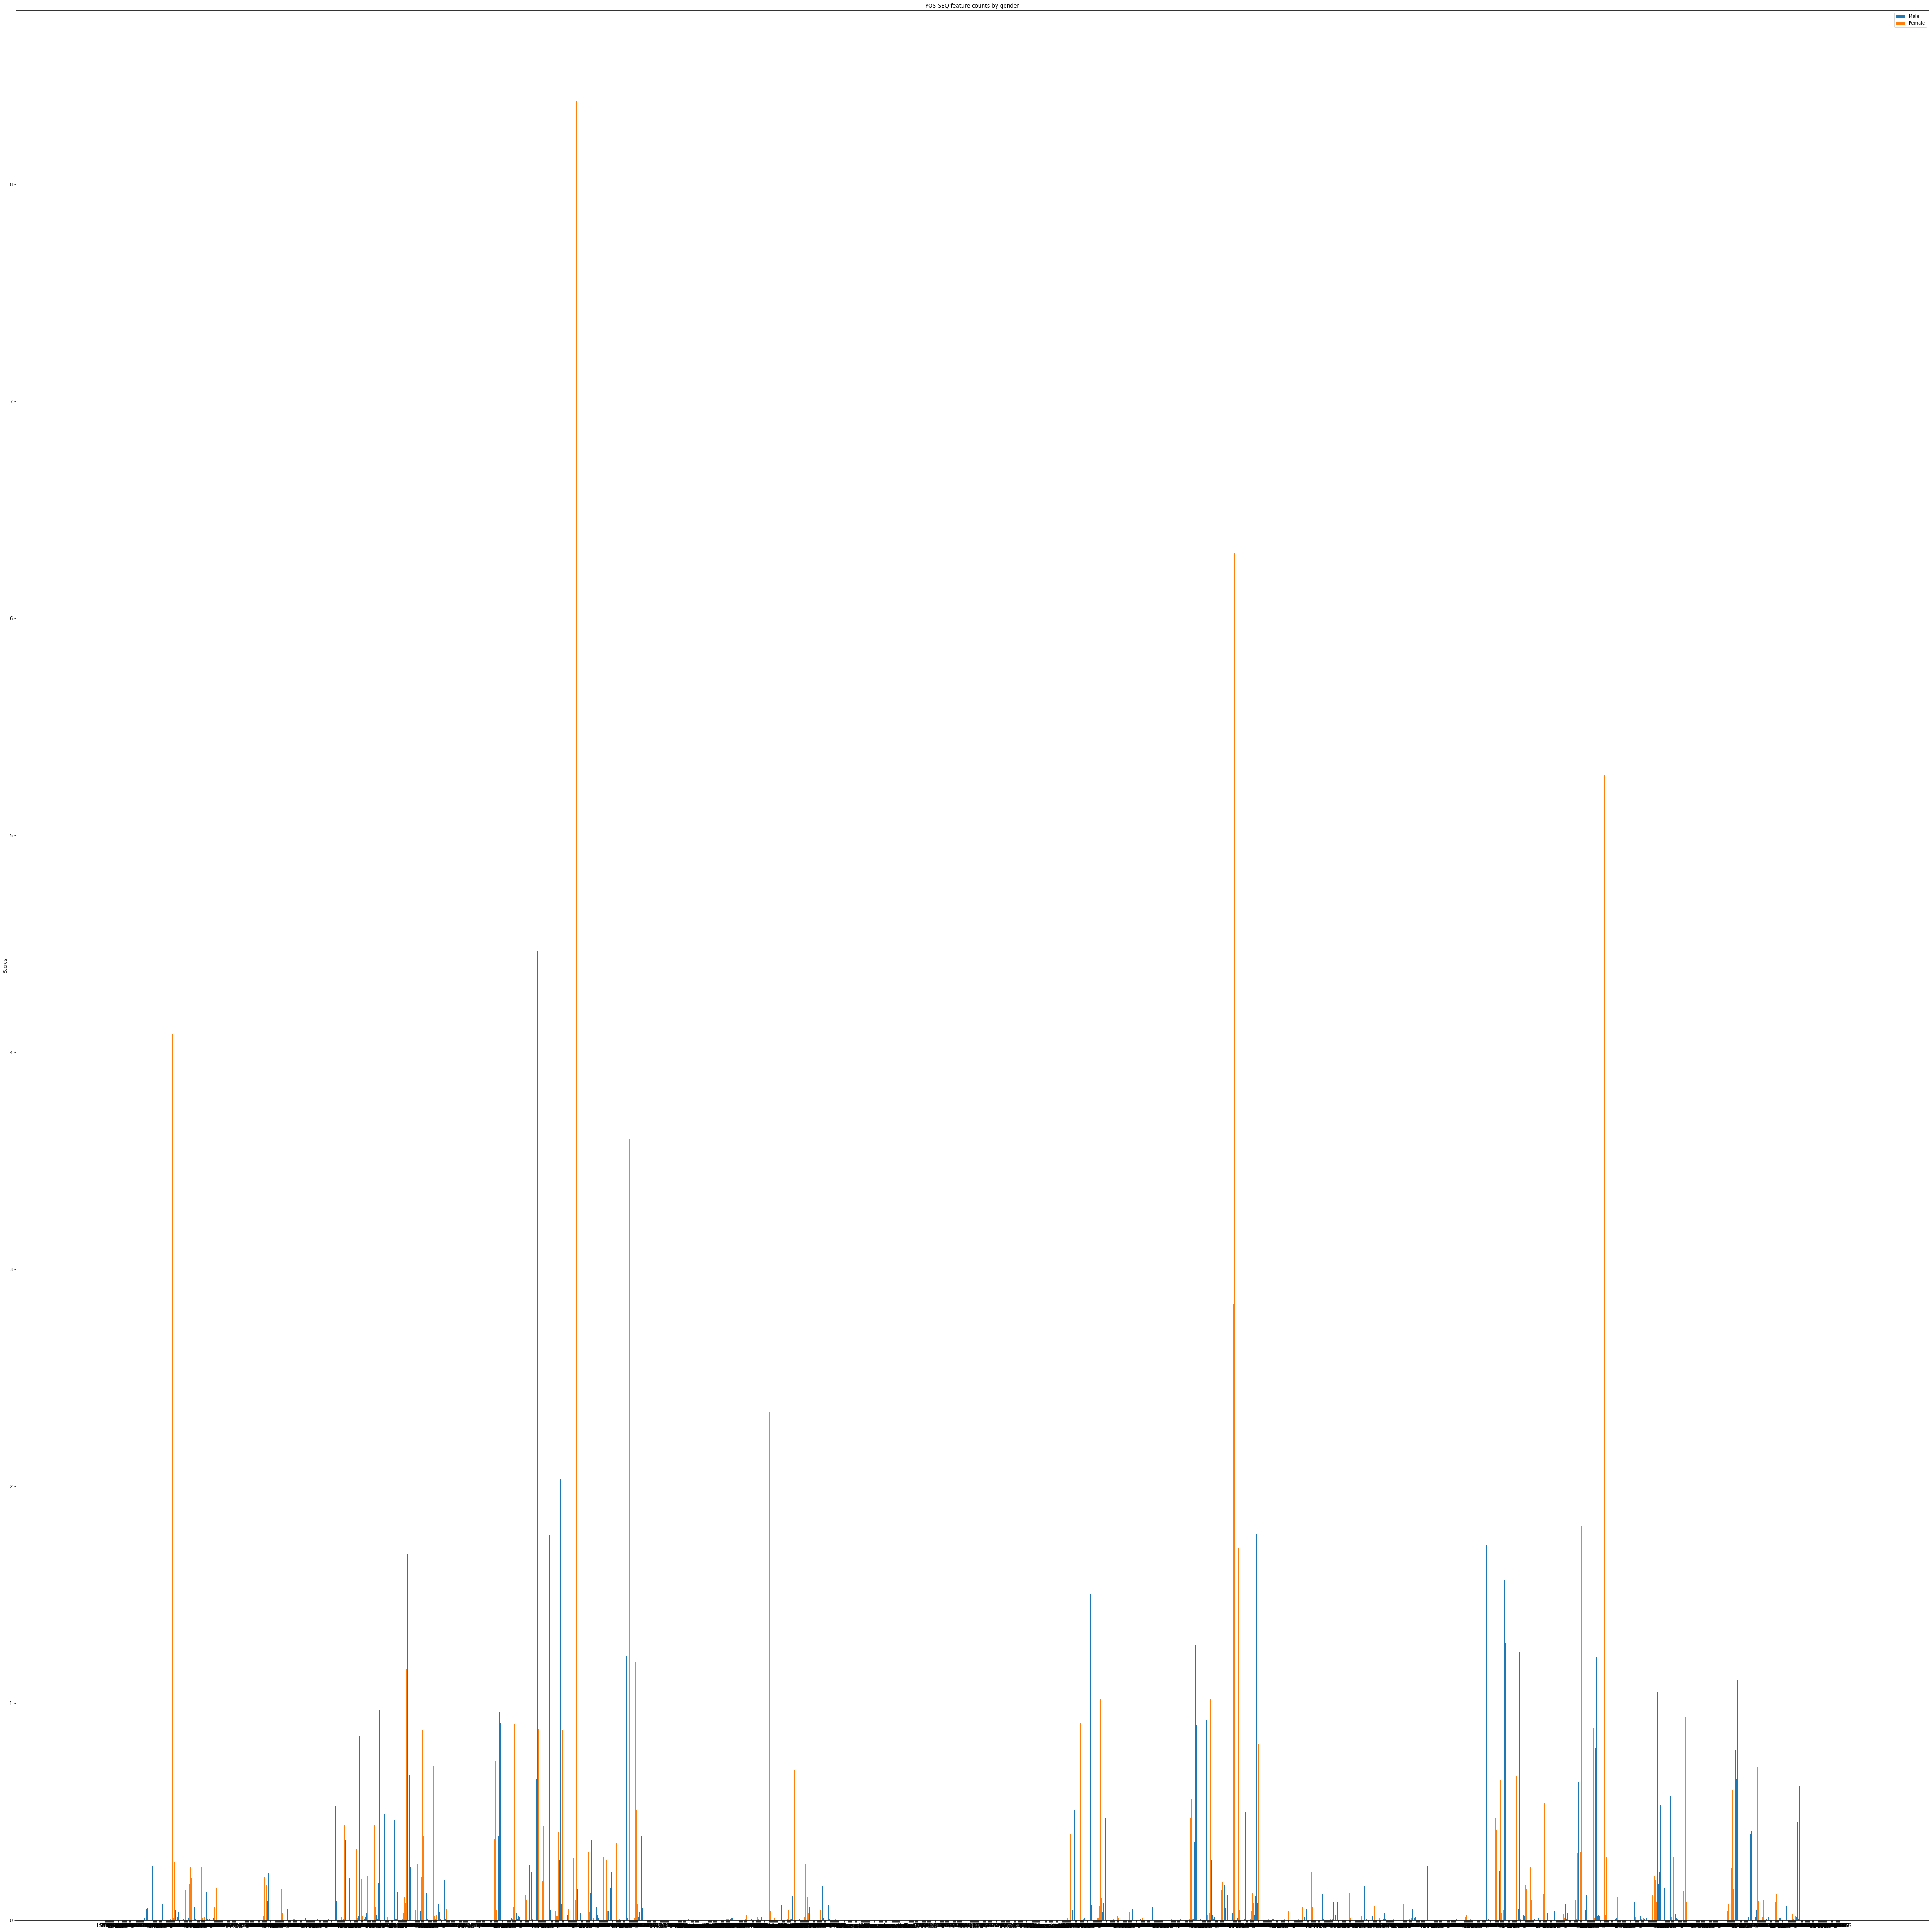

In [8]:
###-------POS-SEQ FEATURES VISUALIZATION (Bigram)----------
labels = []
length = len(tagseq)
male_means = np.zeros(length)
female_means = np.zeros(length)

for label in tagseq:
  split_label = label.split()
  new_label = split_label[0]+'-'+split_label[1]
  labels.append(new_label)

male_count = 0
female_count = 0
for idx in range(len(essays)):
  if gender_label[idx] == 0: #male
    male_means += np.asarray(pos_seq_features[idx])
    male_count += 1
  else:
    female_means += np.asarray(pos_seq_features[idx])
    female_count += 1

male_means = male_means/male_count
female_means = female_means/female_count

male_means = list(male_means)
female_means = list(female_means)

create_plot(labels, male_means, female_means, 'POS-SEQ feature counts by gender',0, 60, 1)


# **n-gram char features:**

In [0]:
###---------ORIGINAL NGRAMS WITH NAIVE BAYES------------

nb_classifier = MultinomialNB()
batches = []
i = 0
while i < 250000:
  batches.append(i)
  i += 5000

print(batches)
acc = 0
for i in batches:
  essays, gender_label, age_label, original_data = prepare_data(data,i, 5000)
  del essays, age_label
  #print('prepared data')
  trainlength = round(0.8*len(gender_label))
  features = original_data

  Xtrain = np.asarray(features[0:trainlength])
  Ytrain = np.asarray(gender_label[0:trainlength])
  Xtest = np.asarray(features[trainlength:])
  Ytest = np.asarray(gender_label[trainlength:])
  del original_data, gender_label
  #print('train,test')

  if i == 0:
    train_data, model = ngram_train_char(Xtrain, 1, []) 
  else:
    train_data, model = ngram_train_char(Xtrain, 1, model) 

  test_data = ngram_test_char(Xtest, model)
  del Xtrain, Xtest
  #print('ngrams')

  nb_classifier.fit(train_data, Ytrain)
  pred = nb_classifier.predict(test_data)
  #print('predicted')

  del train_data, test_data,
  acc += accuracy_score(Ytest, pred)
  print('Batch', batches.index(i), ':', accuracy_score(Ytest, pred))
  del Ytrain, Ytest, pred
print('Overall accuracy:', acc/len(batches))

filename = 'ngram_char_model.sav'
pickle.dump(nb_classifier, open(filename, 'wb'))


[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000, 95000, 100000, 105000, 110000, 115000, 120000, 125000, 130000, 135000, 140000, 145000, 150000, 155000, 160000, 165000, 170000, 175000, 180000, 185000, 190000, 195000, 200000, 205000, 210000, 215000, 220000, 225000, 230000, 235000, 240000, 245000]
Batch 0 : 0.582
Batch 1 : 0.561
Batch 2 : 0.579
Batch 3 : 0.567
Batch 4 : 0.551
Batch 5 : 0.605
Batch 6 : 0.58
Batch 7 : 0.603
Batch 8 : 0.54
Batch 9 : 0.585
Batch 10 : 0.587
Batch 11 : 0.586
Batch 12 : 0.553
Batch 13 : 0.561
Batch 14 : 0.588
Batch 15 : 0.593
Batch 16 : 0.599
Batch 17 : 0.575
Batch 18 : 0.567
Batch 19 : 0.551
Batch 20 : 0.568
Batch 21 : 0.561
Batch 22 : 0.527
Batch 23 : 0.582
Batch 24 : 0.604
Batch 25 : 0.569
Batch 26 : 0.51
Batch 27 : 0.608
Batch 28 : 0.576
Batch 29 : 0.541
Batch 30 : 0.581
Batch 31 : 0.526
Batch 32 : 0.575
Batch 33 : 0.59
Batch 34 : 0.54
Batch 35 : 0.595
Batch 36 : 0.553
Batch 37 :

# **n-gram word features:**

In [0]:
###---------ORIGINAL NGRAMS WITH NAIVE BAYES------------

nb_classifier = MultinomialNB()

batches = []
i = 0
while i < 250000:
  batches.append(i)
  i += 5000

acc = 0
for i in batches:
  essays, gender_label, age_label, original_data = prepare_data(data,i, 5000)
  trainlength = round(0.8*len(gender_label))
  features = original_data

  Xtrain = np.asarray(features[0:trainlength])
  Ytrain = np.asarray(gender_label[0:trainlength])
  Xtest = np.asarray(features[trainlength:])
  Ytest = np.asarray(gender_label[trainlength:])

  if i == 0:
    train_data, model = ngram_train(Xtrain, 1, []) 
  else:
    train_data, model = ngram_train(Xtrain, 1, model) 

  test_data = ngram_test(Xtest, model)

  nb_classifier.fit(train_data, Ytrain)
  pred = nb_classifier.predict(test_data)
  acc += accuracy_score(Ytest, pred)
  print('Batch', batches.index(i), ':', accuracy_score(Ytest, pred))
print('Overall accuracy:', acc/len(batches))

filename = 'ngram_classifier_model.sav'
pickle.dump(nb_classifier, open(filename, 'wb'))

filename = 'ngram_model.sav'
pickle.dump(model, open(filename, 'wb'))


Batch 0 : 0.607
Batch 1 : 0.629
Batch 2 : 0.612
Batch 3 : 0.616
Batch 4 : 0.615
Batch 5 : 0.602
Batch 6 : 0.626
Batch 7 : 0.633
Batch 8 : 0.655
Batch 9 : 0.649
Batch 10 : 0.597
Batch 11 : 0.613
Batch 12 : 0.591
Batch 13 : 0.599
Batch 14 : 0.632
Batch 15 : 0.626
Batch 16 : 0.665
Batch 17 : 0.632
Batch 18 : 0.619
Batch 19 : 0.584
Batch 20 : 0.607
Batch 21 : 0.618
Batch 22 : 0.64
Batch 23 : 0.634
Batch 24 : 0.648
Batch 25 : 0.627
Batch 26 : 0.57
Batch 27 : 0.638
Batch 28 : 0.613
Batch 29 : 0.616
Batch 30 : 0.627
Batch 31 : 0.615
Batch 32 : 0.612
Batch 33 : 0.608
Batch 34 : 0.614
Batch 35 : 0.639
Batch 36 : 0.631
Batch 37 : 0.626
Batch 38 : 0.635
Batch 39 : 0.625
Batch 40 : 0.632
Batch 41 : 0.596
Batch 42 : 0.621
Batch 43 : 0.646
Batch 44 : 0.636
Batch 45 : 0.595
Batch 46 : 0.627
Batch 47 : 0.612
Batch 48 : 0.6
Batch 49 : 0.624
Overall accuracy: 0.6206799999999998


In [0]:
###------SVM WITH NGRAMS----------

classifier = svm.SVC(kernel='rbf')

batches = []
i = 0
while i < 250000:
  batches.append(i)
  i += 5000

acc = 0
for i in batches:
  essays, gender_label, age_label, original_data = prepare_data(data, i, 5000)
  trainlength = round(0.8*len(essays))
  features = original_data

  Xtrain = np.asarray(features[0:trainlength])
  Ytrain = np.asarray(gender_label[0:trainlength])
  Xtest = np.asarray(features[trainlength:])
  Ytest = np.asarray(gender_label[trainlength:])

  if i == 0:
    train_data, model = ngram_train(Xtrain, 1, [])
  else:
    train_data, model = ngram_train(Xtrain, 1, model) 
 
  test_data = ngram_test(Xtest, model)

  classifier.fit(train_data, Ytrain)
  pred = classifier.predict(test_data)
  acc += accuracy_score(Ytest, pred)
  print('Batch', batches.index(i), ':', accuracy_score(Ytest, pred))
print('Overall accuracy:', acc/len(batches))

Batch 0 : 0.555
Batch 1 : 0.583
Batch 2 : 0.615
Batch 3 : 0.588
Batch 4 : 0.591
Batch 5 : 0.571
Batch 6 : 0.582
Batch 7 : 0.591
Batch 8 : 0.575
Batch 9 : 0.605
Batch 10 : 0.598
Batch 11 : 0.585
Batch 12 : 0.582
Batch 13 : 0.578
Batch 14 : 0.609
Batch 15 : 0.593
Batch 16 : 0.602
Batch 17 : 0.596
Batch 18 : 0.586
Batch 19 : 0.575
Batch 20 : 0.577
Batch 21 : 0.612
Batch 22 : 0.592
Batch 23 : 0.57
Batch 24 : 0.564
Batch 25 : 0.57
Batch 26 : 0.567
Batch 27 : 0.588
Batch 28 : 0.559
Batch 29 : 0.617
Batch 30 : 0.592
Batch 31 : 0.551
Batch 32 : 0.587
Batch 33 : 0.581
Batch 34 : 0.579
Batch 35 : 0.605
Batch 36 : 0.583
Batch 37 : 0.628
Batch 38 : 0.614
Batch 39 : 0.611
Batch 40 : 0.584
Batch 41 : 0.586
Batch 42 : 0.587
Batch 43 : 0.579
Batch 44 : 0.559
Batch 45 : 0.563
Batch 46 : 0.581
Batch 47 : 0.555
Batch 48 : 0.592
Batch 49 : 0.61
Overall accuracy: 0.5860599999999999


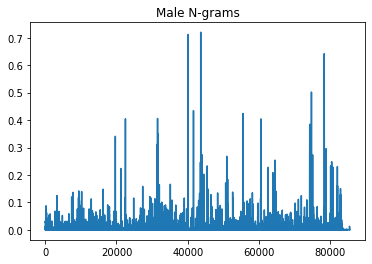

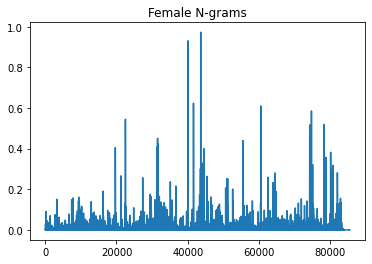

In [0]:
###-------NGRAM FEATURES VISUALIZATION ----------
labels = []
mat_shape = train_data[0].shape
male_means =  scipy.sparse.csr_matrix(mat_shape)
female_means =  scipy.sparse.csr_matrix(mat_shape)

male_count = 0
female_count = 0
for idx in range(round(len(essays)*0.8)):
  if gender_label[idx] == 0: #male
    male_means = (male_means.tocsr() + train_data[idx].tocsr())
    male_count += 1
  else:
    female_means = (female_means.tocsr() + train_data[idx].tocsr())
    female_count += 1

male_means = male_means/male_count
female_means = female_means/female_count

#male_means = list(male_means)
#female_means = list(female_means)
male_m = scipy.sparse.csr_matrix.toarray(male_means)
plt.plot(male_m[0])
plt.title('Male N-grams')
plt.show()

female_m = scipy.sparse.csr_matrix.toarray(female_means)
plt.plot(female_m[0])
plt.title('Female N-grams')
plt.show()
#create_plot(labels, male_means, female_means, 'POS-SEQ feature counts by gender',0, 60, 1)


**Using sentiment:**

In [9]:
###------SVM WITH SENTIMENT FEATURES-------

#rbf: 54, linear:53.525, poly:52.15
classifier = svm.SVC(kernel='poly')
batches = [0, 20000, 40000, 60000, 80000]
acc = 0
for i in batches:
  essays, gender_label, age_label, original_data = prepare_data(data, i, 20000)
  total_feat = sentiment_features(essays)
  length = len(total_feat)
  trainlength = round(0.8*length)
  features = total_feat
  Xtrain = np.asarray(features[:trainlength])
  Ytrain = np.asarray(gender_label[:trainlength])

#Xtrain = Xtrain.reshape(-1, 1)

  classifier.fit(Xtrain, Ytrain)
  Xtest = np.asarray(features[trainlength:])
  Ytest = np.asarray(gender_label[trainlength:])

#Xtest = Xtest.reshape(-1, 1)

  pred = classifier.predict(Xtest)
  acc += accuracy_score(Ytest, pred)
  print('Batch', batches.index(i), ':', accuracy_score(Ytest, pred))
print('Overall accuracy:', acc/len(batches))

Batch 0 : 0.5215
Batch 1 : 0.4955
Batch 2 : 0.5145
Batch 3 : 0.50975
Batch 4 : 0.50875
Overall accuracy: 0.51


In [10]:
###-----KNN WITH SENTIMENT FEATURES---------
clf = neighbors.KNeighborsClassifier(75)
batches = [0, 20000, 40000, 60000, 80000]
acc = 0
for i in batches:
  essays, gender_label, age_label, original_data = prepare_data(data, i, 20000)
  total_feat = sentiment_features(essays)
  length = len(total_feat)
  trainlength = round(0.8*length)
  features = total_feat
  Xtrain = np.asarray(features[:trainlength])
  Ytrain = np.asarray(gender_label[:trainlength])

  clf.fit(Xtrain, Ytrain)

  Xtest = np.asarray(features[trainlength:])
  Ytest = np.asarray(gender_label[trainlength:])

#Xtest = Xtest.reshape(-1, 1)

  pred = clf.predict(Xtest)
  acc += accuracy_score(Ytest, pred)
  print('Batch',batches.index(i), ':',accuracy_score(Ytest, pred))
print('Overall accuracy:', acc/len(batches))

Batch 0 : 0.52125
Batch 1 : 0.51825
Batch 2 : 0.516
Batch 3 : 0.52975
Batch 4 : 0.52275
Overall accuracy: 0.5216


# **Analysis on generalization dataset**
Load the file: blog-gender-dataset.csv

In [0]:
new_data = pd.read_csv('blog-gender-dataset.csv', sep="\t", encoding="ISO-8859-1")

In [0]:
def search_for(biglist):
  y = []
  x = []
  string = ''
  for i in range(len(biglist)):
    if biglist[i] == 'M' or biglist[i] == 'm':
      x.append(string)
      y.append(0)
      string = ''
    elif biglist[i] == 'F' or biglist[i] == 'f':
      x.append(string)
      y.append(1)
      string = ''
    else:
      string = string+' '+biglist[i]
  return x,y

In [0]:
all_essays = []
gender = []

for idx in range(len(new_data)):
  s = new_data.iloc[idx]
  t = prepare_test(s)
  x,y = search_for(t[0])
  for j in range(len(x)): 
    all_essays.append(x[j])
    gender.append(y[j])

filename1 = 'ngram_model.sav'
loaded_model1 = pickle.load(open(filename1, 'rb'))
filename2 = 'ngram_classifier_model.sav'
loaded_model2 = pickle.load(open(filename2, 'rb'))

all_essays = np.asarray(all_essays)
test_data = ngram_test(all_essays, loaded_model1)

pred = loaded_model2.predict(test_data)
pred = np.asarray(pred)
gender = np.asarray(gender)
print('Accuracy score for generalization dataset:', accuracy_score(gender, pred))
print('Confusion matrix:')
print(confusion_matrix(gender, pred))

Accuracy score for generalization dataset: 0.6163180996643429
Confusion matrix:
[[1448  814]
 [ 672  939]]


# **Analysis on HP dataset:**
Make sure that you have uploaded the file: training_set_rel3.tsv. Also, load the models: ngram_classifier_model.sav and ngram_model.sav

In [0]:
#Parth's code
%matplotlib inline

dataset_path = "training_set_rel3.tsv"
data = pd.read_csv(dataset_path, sep="\t", encoding="ISO-8859-1", index_col="essay_id")
min_scores = [2, 1, 0, 0, 0, 0, 0, 0]
max_scores = [12, 6, 3, 3, 4, 4, 30, 60]

essay_sets, data_min_scores, data_max_scores = split_in_sets(data)
set1, set2, set3, set4, set5, set6, set7, set8 = tuple(essay_sets)
data.dropna(axis=1, inplace=True)

data.drop(columns=["rater1_domain1", "rater2_domain1"], inplace=True)
print("All Data:", len(data))
data.head()

Set 1 : Essays =  1783 	 Attributes =  5
Set 2 : Essays =  1800 	 Attributes =  8
Set 3 : Essays =  1726 	 Attributes =  5
Set 4 : Essays =  1770 	 Attributes =  5
Set 5 : Essays =  1805 	 Attributes =  5
Set 6 : Essays =  1800 	 Attributes =  5
Set 7 : Essays =  1569 	 Attributes =  13
Set 8 : Essays =  723 	 Attributes =  17
All Data: 12976


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,essay_set,essay,domain1_score
essay_id,,,
1,1,"Dear local newspaper, I think effects computer...",8
2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9
3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7
4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10
5,1,"Dear @LOCATION1, I know having computers has a...",8


In [0]:
#Parth's code
#Dataset keys
essay_id_key = "essay_id"
essay_set_key = "essay_set"
essay_key = "essay"
domain1_score_key = "domain1_score"

**Analysis on individual sets:**

In [0]:
e1, e2, e3, e4, e5, e6, e7, e8 = [], [], [], [], [], [], [], []
s1, s2, s3, s4, s5, s6, s7, s8 = [], [], [], [], [], [], [], []

for idx in range(len(set1)):
  e1.append(set1.iloc[idx][essay_key])
  s1.append(set1.iloc[idx][domain1_score_key])

for idx in range(len(set2)):
  e2.append(set2.iloc[idx][essay_key])
  s2.append(set2.iloc[idx][domain1_score_key])

for idx in range(len(set3)):
  e3.append(set3.iloc[idx][essay_key])
  s3.append(set3.iloc[idx][domain1_score_key])

for idx in range(len(set4)):
  e4.append(set4.iloc[idx][essay_key])
  s4.append(set4.iloc[idx][domain1_score_key])

for idx in range(len(set5)):
  e5.append(set5.iloc[idx][essay_key])
  s5.append(set5.iloc[idx][domain1_score_key])

for idx in range(len(set6)):
  e6.append(set6.iloc[idx][essay_key])
  s6.append(set6.iloc[idx][domain1_score_key])

for idx in range(len(set7)):
  e7.append(set7.iloc[idx][essay_key])
  s7.append(set7.iloc[idx][domain1_score_key])

for idx in range(len(set8)):
  e8.append(set8.iloc[idx][essay_key])
  s8.append(set8.iloc[idx][domain1_score_key])

filename1 = 'ngram_model.sav'
loaded_model1 = pickle.load(open(filename1, 'rb'))
filename2 = 'ngram_classifier_model.sav'
loaded_model2 = pickle.load(open(filename2, 'rb'))

e1 = np.asarray(e1)
e2 = np.asarray(e2)
e3 = np.asarray(e3)
e4 = np.asarray(e4)
e5 = np.asarray(e5)
e6 = np.asarray(e6)
e7 = np.asarray(e7)
e8 = np.asarray(e8)

s1 = np.asarray(s1)
s2 = np.asarray(s2)
s3 = np.asarray(s3)
s4 = np.asarray(s4)
s5 = np.asarray(s5)
s6 = np.asarray(s6)
s7 = np.asarray(s7)
s8 = np.asarray(s8)

for i in range(8):
  if i == 0:
    all_essays = e1
    all_scores = s1
  elif i == 1:
    all_essays = e2
    all_scores = s2

  elif i == 2:
    all_essays = e3
    all_scores = s3

  elif i == 3:
    all_essays = e4
    all_scores = s4

  elif i == 4:
    all_essays = e5
    all_scores = s5

  elif i == 5:
    all_essays = e6
    all_scores = s6

  elif i == 6:
    all_essays = e7
    all_scores = s7

  else:
    all_essays = e8
    all_scores = s8

  #essay_data = prepare_test(all_essays)
  #print(type(all_essays), type(essay_data))
  test_data = ngram_test(all_essays, loaded_model1)

  pred = loaded_model2.predict(test_data)

  f_pred_scores = 0
  m_pred_scores = 0
  f_count = 0
  m_count = 0

  for idx in range(len(all_essays)):
    if pred[idx] == 0: #male
      m_count += 1
      m_pred_scores += all_scores[idx]
    else:
      f_count += 1
      f_pred_scores += all_scores[idx]
  
  avg_male = m_pred_scores/m_count
  avg_female = f_pred_scores/f_count
  print('Avg male score for set', i+1, ':', avg_male)
  print('Avg female score for set:', i+1, ':',avg_female)
  print('Number of males for set', i+1, ':',m_count)
  print('Number of females for set', i+1, ':',f_count)
  print('\n')

Avg male score for set 1 : 8.663244353182751
Avg female score for set: 1 : 7.916149068322981
Number of males for set 1 : 1461
Number of females for set 1 : 322


Avg male score for set 2 : 3.5734557595993324
Avg female score for set: 2 : 3.101328903654485
Number of males for set 2 : 1198
Number of females for set 2 : 602


Avg male score for set 3 : 1.878188775510204
Avg female score for set: 3 : 1.5506329113924051
Number of males for set 3 : 1568
Number of females for set 3 : 158


Avg male score for set 4 : 1.6603773584905661
Avg female score for set: 4 : 1.3480278422273781
Number of males for set 4 : 477
Number of females for set 4 : 1293


Avg male score for set 5 : 2.603448275862069
Avg female score for set: 5 : 2.3415361670395227
Number of males for set 5 : 464
Number of females for set 5 : 1341


Avg male score for set 6 : 2.728595411303861
Avg female score for set: 6 : 1.5384615384615385
Number of males for set 6 : 1787
Number of females for set 6 : 13


Avg male score for set 

**Analysis on entire dataset:**
Note that scores have been normalized

In [0]:
all_essays = []
all_scores = []

for idx in range(len(data)):
  all_essays.append(data.iloc[idx][essay_key])
  all_scores.append(data.iloc[idx][domain1_score_key])

filename1 = 'ngram_model.sav'
loaded_model1 = pickle.load(open(filename1, 'rb'))
filename2 = 'ngram_classifier_model.sav'
loaded_model2 = pickle.load(open(filename2, 'rb'))

all_essays = np.asarray(all_essays)
test_data = ngram_test(all_essays, loaded_model1)

pred = loaded_model2.predict(test_data)

f_pred_scores = 0
m_pred_scores = 0
f_count = 0
m_count = 0

for idx in range(len(data)):
  if pred[idx] == 0: #male
    m_count += 1
    m_pred_scores += all_scores[idx]
  else:
    f_count += 1
    f_pred_scores += all_scores[idx]
  
avg_male = m_pred_scores/m_count
avg_female = f_pred_scores/f_count
print('Avg male score:', avg_male)
print('Avg female score:', avg_female)
print('Number of males:', m_count)
print('Number of females:', f_count)

Avg male score: 4.510503913222573
Avg female score: 9.729492359037414
Number of males: 7283
Number of females: 5693


In [0]:
import operator

mdict = {}
mscore = {}
fscore = {}
fdict = {}
tdict = {}
tscore = {}

for idx in range(len(data)):
  writtenwhole = data.iloc[idx][essay_key]
  written = writtenwhole.split(' ')
  if pred[idx] == 0:
    for word in written:
      w = word.lower()
      if w in stop_words or w == ' ' or len(w) == 0:
        continue
      if w[0] == '@':
        continue
      if w not in mdict:
        mdict[w] = 1
        mscore[w] = norm_score[idx]
      else:
        mdict[w] += 1
        mscore[w] += norm_score[idx]
      if w not in tdict:
        tdict[w] = 1
        tscore[w] = norm_score[idx]
      else:
        tdict[w] += 1
        tscore[w] += norm_score[idx]
  else:
    for word in written:
      w = word.lower()
      #print('jel', w)
      if w in stop_words or w == ' ' or len(w) == 0:
        continue
      if w[0] == '@':
        continue
      if w not in fdict:
        fdict[w] = 1
        fscore[w] = norm_score[idx]
      else:
        fdict[w] += 1
        fscore[w] += norm_score[idx]

      if w not in tdict:
        tdict[w] = 1
        tscore[w] = norm_score[idx]
      else:
        tdict[w] += 1
        tscore[w] += norm_score[idx]
    
mm = dict(sorted(mdict.items(), key=operator.itemgetter(1), reverse=True)[:10])
ff = dict(sorted(fdict.items(), key=operator.itemgetter(1), reverse=True)[:10])
print('Males:', [w for w in mm.keys()])
print('Females:', [w for w in ff.keys()])

for idx in mdict:
  mscore[idx] = mscore[idx]/mdict[idx]
for idx in fdict:
  fscore[idx] = fscore[idx]/fdict[idx]
for idx in tdict:
  tscore[idx] = tscore[idx]/tdict[idx]


print('Top 10 scoring words:','   ','Avg no. of times used by males in an essay', '   ','Avg no. of times used by females in an essay')
s2 = dict(sorted(tdict.items(), key=operator.itemgetter(1), reverse=True)[:10])
#print(s2)
for w in s2:
  print(w, '                   ', mscore[w], '                      ', fscore[w])


Males: ['people', 'would', 'computers', 'computer', 'many', 'could', 'one', 'building', 'also', 'like']
Females: ['people', 'like', 'would', 'get', 'one', 'time', 'think', 'go', 'author', 'got']


Top 10 scoring words:     Avg no. of times used by males in an essay     Avg no. of times used by females in an essay
people                     0.6895147781920875                        0.6072997644287381
would                     0.7115344027015519                        0.6075053477908029
like                     0.6660970557774836                        0.5820515316718529
computers                     0.7467899332306276                        0.679380185456323
one                     0.6899979691307958                        0.6041606425702792
get                     0.679354504404471                        0.5929995569339739
could                     0.708059604794306                        0.6220195086705191
think                     0.64203528827038                        0.55618382621

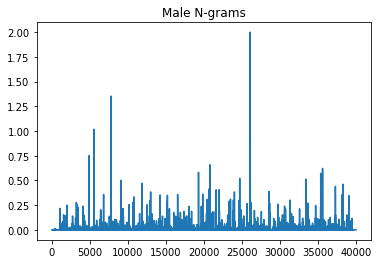

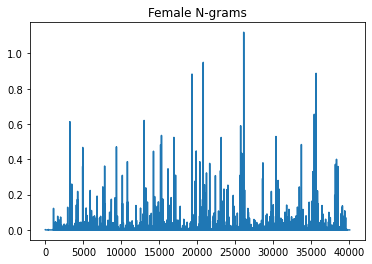

In [0]:
###-------NGRAM FEATURES VISUALIZATION ----------
labels = []
mat_shape = test_data[0].shape
male_means =  scipy.sparse.csr_matrix(mat_shape)
female_means =  scipy.sparse.csr_matrix(mat_shape)

male_count = 0
female_count = 0
for idx in range(len(data)):
  if pred[idx] == 0: #male
    male_means = (male_means.tocsr() + test_data[idx].tocsr())
    male_count += 1
  else:
    female_means = (female_means.tocsr() + test_data[idx].tocsr())
    female_count += 1

male_means = male_means/male_count
female_means = female_means/female_count

#male_means = list(male_means)
#female_means = list(female_means)
male_m = scipy.sparse.csr_matrix.toarray(male_means)
plt.plot(male_m[0])
plt.title('Male N-grams')
plt.show()

female_m = scipy.sparse.csr_matrix.toarray(female_means)
plt.plot(female_m[0])
plt.title('Female N-grams')
plt.show()
